In [1]:
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)
from numpy.random import seed
seed(123)

2.6.0
2.6.0


# Zad
Porównaj wyniki działań różnych optymalizacji
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
```
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
RMSprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
```
* 
```python
Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
```
* 
```python
Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```

https://keras.io/optimizers/

In [2]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None, engine='python')
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None, engine='python') # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


(15060, 41)

# SGD

In [4]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [5]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

d:\AppTrue\Anaconda\envs\tf_gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [6]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=30, callbacks=[history_sgd])

Epoch 1/30
943/943 [==============================] - 11s 10ms/step - loss: 0.5379 - accuracy: 0.7468 - val_loss: 0.4400 - val_accuracy: 0.7592
Epoch 2/30
943/943 [==============================] - 19s 20ms/step - loss: 0.3644 - accuracy: 0.8274 - val_loss: 0.3433 - val_accuracy: 0.8424
Epoch 3/30
943/943 [==============================] - 18s 19ms/step - loss: 0.3391 - accuracy: 0.8401 - val_loss: 0.3392 - val_accuracy: 0.8428
Epoch 4/30
943/943 [==============================] - 12s 13ms/step - loss: 0.3335 - accuracy: 0.8443 - val_loss: 0.3327 - val_accuracy: 0.8440
Epoch 5/30
943/943 [==============================] - 9s 9ms/step - loss: 0.3310 - accuracy: 0.8451 - val_loss: 0.3311 - val_accuracy: 0.8430
Epoch 6/30
943/943 [==============================] - 15s 16ms/step - loss: 0.3290 - accuracy: 0.8454 - val_loss: 0.3294 - val_accuracy: 0.8471
Epoch 7/30
943/943 [==============================] - 13s 14ms/step - loss: 0.3281 - accuracy: 0.8458 - val_loss: 0.3334 - val_accuracy: 0

In [7]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

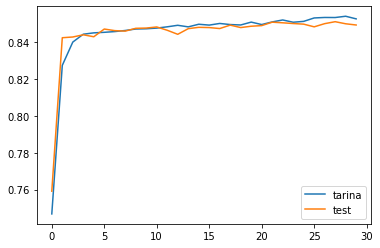

In [8]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

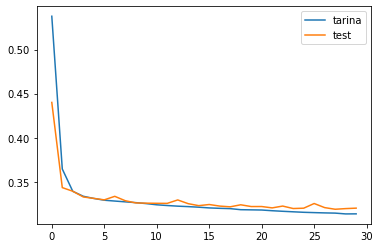

In [9]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

# RMSprop

In [10]:
RMSprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
history_rms = History()

model.compile(loss="binary_crossentropy",optimizer=RMSprop, metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=30, callbacks=[history_rms])

Epoch 1/30
943/943 [==============================] - 69s 65ms/step - loss: 0.3179 - accuracy: 0.8516 - val_loss: 0.3206 - val_accuracy: 0.8508
Epoch 2/30
943/943 [==============================] - 55s 58ms/step - loss: 0.3173 - accuracy: 0.8516 - val_loss: 0.3250 - val_accuracy: 0.8501
Epoch 3/30
943/943 [==============================] - 57s 61ms/step - loss: 0.3177 - accuracy: 0.8524 - val_loss: 0.3218 - val_accuracy: 0.8509
Epoch 4/30
943/943 [==============================] - 51s 54ms/step - loss: 0.3163 - accuracy: 0.8539 - val_loss: 0.3226 - val_accuracy: 0.8495
Epoch 5/30
943/943 [==============================] - 41s 43ms/step - loss: 0.3167 - accuracy: 0.8515 - val_loss: 0.3271 - val_accuracy: 0.8509
Epoch 6/30
943/943 [==============================] - 38s 41ms/step - loss: 0.3159 - accuracy: 0.8519 - val_loss: 0.3205 - val_accuracy: 0.8513
Epoch 7/30
943/943 [==============================] - 54s 57ms/step - loss: 0.3156 - accuracy: 0.8544 - val_loss: 0.3203 - val_accuracy:

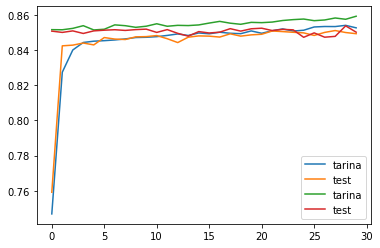

In [11]:
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.plot(history_rms.history['accuracy'], label = "tarina")
plt.plot(history_rms.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

# Adagrad

In [12]:
Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
Adam2 = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
history_adagrad = History()
history_adadelta = History()
history_adam = History()
history_adam2 = History()

model.compile(loss="binary_crossentropy",optimizer=Adagrad, metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=30, callbacks=[history_adagrad])

Epoch 1/30
943/943 [==============================] - 35s 34ms/step - loss: 0.3032 - accuracy: 0.8607 - val_loss: 0.3185 - val_accuracy: 0.8530
Epoch 2/30
943/943 [==============================] - 31s 33ms/step - loss: 0.3021 - accuracy: 0.8612 - val_loss: 0.3188 - val_accuracy: 0.8513
Epoch 3/30
943/943 [==============================] - 20s 21ms/step - loss: 0.3015 - accuracy: 0.8613 - val_loss: 0.3181 - val_accuracy: 0.8528
Epoch 4/30
943/943 [==============================] - 20s 21ms/step - loss: 0.3013 - accuracy: 0.8618 - val_loss: 0.3181 - val_accuracy: 0.8527
Epoch 5/30
943/943 [==============================] - 19s 21ms/step - loss: 0.3010 - accuracy: 0.8623 - val_loss: 0.3177 - val_accuracy: 0.8533
Epoch 6/30
943/943 [==============================] - 19s 21ms/step - loss: 0.3008 - accuracy: 0.8621 - val_loss: 0.3176 - val_accuracy: 0.8536
Epoch 7/30
943/943 [==============================] - 18s 19ms/step - loss: 0.3003 - accuracy: 0.8619 - val_loss: 0.3181 - val_accuracy:

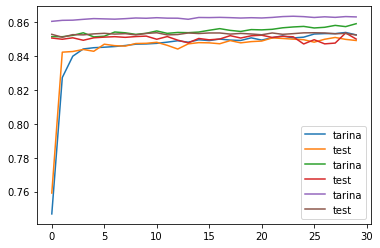

In [13]:
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.plot(history_rms.history['accuracy'], label = "tarina")
plt.plot(history_rms.history['val_accuracy'], label = "test")
plt.plot(history_adagrad.history['accuracy'], label = "tarina")
plt.plot(history_adagrad.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

# Adadelta

In [14]:
model.compile(loss="binary_crossentropy",optimizer=Adadelta, metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=30, callbacks=[history_adadelta])

Epoch 1/30
943/943 [==============================] - 20s 19ms/step - loss: 0.3019 - accuracy: 0.8603 - val_loss: 0.3185 - val_accuracy: 0.8533
Epoch 2/30
943/943 [==============================] - 16s 17ms/step - loss: 0.3016 - accuracy: 0.8607 - val_loss: 0.3189 - val_accuracy: 0.8524
Epoch 3/30
943/943 [==============================] - 17s 18ms/step - loss: 0.3011 - accuracy: 0.8616 - val_loss: 0.3222 - val_accuracy: 0.8481
Epoch 4/30
943/943 [==============================] - 17s 18ms/step - loss: 0.3001 - accuracy: 0.8592 - val_loss: 0.3212 - val_accuracy: 0.8480
Epoch 5/30
943/943 [==============================] - 16s 17ms/step - loss: 0.2998 - accuracy: 0.8625 - val_loss: 0.3199 - val_accuracy: 0.8514
Epoch 6/30
943/943 [==============================] - 17s 18ms/step - loss: 0.2995 - accuracy: 0.8614 - val_loss: 0.3209 - val_accuracy: 0.8519
Epoch 7/30
943/943 [==============================] - 17s 18ms/step - loss: 0.2990 - accuracy: 0.8624 - val_loss: 0.3236 - val_accuracy:

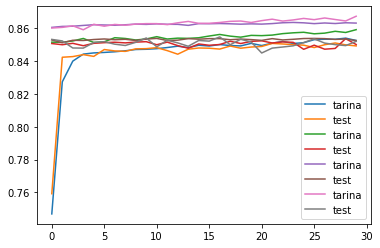

In [15]:
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.plot(history_rms.history['accuracy'], label = "tarina")
plt.plot(history_rms.history['val_accuracy'], label = "test")
plt.plot(history_adagrad.history['accuracy'], label = "tarina")
plt.plot(history_adagrad.history['val_accuracy'], label = "test")
plt.plot(history_adadelta.history['accuracy'], label = "tarina")
plt.plot(history_adadelta.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

# Adam

In [16]:
model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=30, callbacks=[history_adam])

Epoch 1/30
943/943 [==============================] - 25s 25ms/step - loss: 0.2903 - accuracy: 0.8663 - val_loss: 0.3248 - val_accuracy: 0.8529
Epoch 2/30
943/943 [==============================] - 19s 21ms/step - loss: 0.2882 - accuracy: 0.8668 - val_loss: 0.3268 - val_accuracy: 0.8509
Epoch 3/30
943/943 [==============================] - 19s 20ms/step - loss: 0.2865 - accuracy: 0.8672 - val_loss: 0.3261 - val_accuracy: 0.8500
Epoch 4/30
943/943 [==============================] - 17s 18ms/step - loss: 0.2854 - accuracy: 0.8677 - val_loss: 0.3342 - val_accuracy: 0.8473
Epoch 5/30
943/943 [==============================] - 17s 18ms/step - loss: 0.2841 - accuracy: 0.8681 - val_loss: 0.3306 - val_accuracy: 0.8481
Epoch 6/30
943/943 [==============================] - 18s 19ms/step - loss: 0.2834 - accuracy: 0.8695 - val_loss: 0.3337 - val_accuracy: 0.8464
Epoch 7/30
943/943 [==============================] - 17s 18ms/step - loss: 0.2811 - accuracy: 0.8687 - val_loss: 0.3276 - val_accuracy:

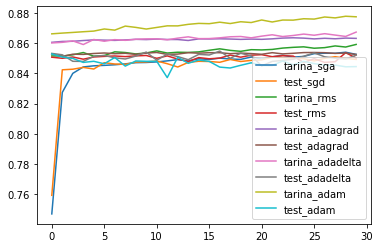

In [17]:
plt.plot(history_sgd.history['accuracy'], label = "tarina_sga")
plt.plot(history_sgd.history['val_accuracy'], label = "test_sgd")
plt.plot(history_rms.history['accuracy'], label = "tarina_rms")
plt.plot(history_rms.history['val_accuracy'], label = "test_rms")
plt.plot(history_adagrad.history['accuracy'], label = "tarina_adagrad")
plt.plot(history_adagrad.history['val_accuracy'], label = "test_adagrad")
plt.plot(history_adadelta.history['accuracy'], label = "tarina_adadelta")
plt.plot(history_adadelta.history['val_accuracy'], label = "test_adadelta")
plt.plot(history_adam.history['accuracy'], label = "tarina_adam")
plt.plot(history_adam.history['val_accuracy'], label = "test_adam")
plt.legend()
plt.show()

# Adam

In [18]:
model.compile(loss="binary_crossentropy",optimizer=Adam2, metrics=["accuracy"])
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=30, callbacks=[history_adam2])

Epoch 1/30
943/943 [==============================] - 33s 32ms/step - loss: 0.2510 - accuracy: 0.8807 - val_loss: 0.3571 - val_accuracy: 0.8469
Epoch 2/30
943/943 [==============================] - 32s 34ms/step - loss: 0.2498 - accuracy: 0.8807 - val_loss: 0.3583 - val_accuracy: 0.8463
Epoch 3/30
943/943 [==============================] - 32s 34ms/step - loss: 0.2492 - accuracy: 0.8816 - val_loss: 0.3599 - val_accuracy: 0.8463
Epoch 4/30
943/943 [==============================] - 32s 34ms/step - loss: 0.2488 - accuracy: 0.8814 - val_loss: 0.3612 - val_accuracy: 0.8463
Epoch 5/30
943/943 [==============================] - 32s 34ms/step - loss: 0.2487 - accuracy: 0.8823 - val_loss: 0.3620 - val_accuracy: 0.8461
Epoch 6/30
943/943 [==============================] - 32s 34ms/step - loss: 0.2485 - accuracy: 0.8816 - val_loss: 0.3618 - val_accuracy: 0.8464
Epoch 7/30
943/943 [==============================] - 29s 31ms/step - loss: 0.2482 - accuracy: 0.8813 - val_loss: 0.3620 - val_accuracy:

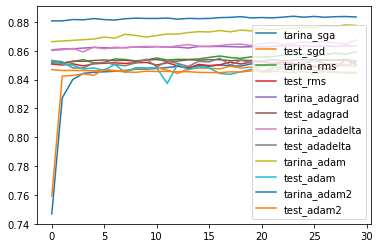

In [19]:
plt.plot(history_sgd.history['accuracy'], label = "tarina_sga")
plt.plot(history_sgd.history['val_accuracy'], label = "test_sgd")
plt.plot(history_rms.history['accuracy'], label = "tarina_rms")
plt.plot(history_rms.history['val_accuracy'], label = "test_rms")
plt.plot(history_adagrad.history['accuracy'], label = "tarina_adagrad")
plt.plot(history_adagrad.history['val_accuracy'], label = "test_adagrad")
plt.plot(history_adadelta.history['accuracy'], label = "tarina_adadelta")
plt.plot(history_adadelta.history['val_accuracy'], label = "test_adadelta")
plt.plot(history_adam.history['accuracy'], label = "tarina_adam")
plt.plot(history_adam.history['val_accuracy'], label = "test_adam")
plt.plot(history_adam2.history['accuracy'], label = "tarina_adam2")
plt.plot(history_adam2.history['val_accuracy'], label = "test_adam2")
plt.legend()
plt.show()